In [1]:
import pandas as pd
import requests as r
from pandas.io.json import json_normalize

In [2]:
def get_BA_demand(ba_code_list, start_date, end_date, api_key):
    time_interval = pd.date_range(start_date, end_date, tz = "UTC", freq='H')
    df_all = pd.DataFrame(index=time_interval)
    
    for ba in ba_code_list:
        try:
            response = r.get('https://api.eia.gov/series/?api_key=' + api_key + '&series_id=EBA.' + ba + '-ALL.D.H')

            df = json_normalize(response.json(),['series','data'])
            df.columns = ['datetime', ba]

            df.index = pd.to_datetime(df['datetime'])
            df.drop(columns=['datetime'], inplace=True)
            df_all = pd.concat([df_all, df], join='outer', axis=1)
            
        except Exception as e:
            print(ba + ' not found')
    
    return df_all

In [3]:
eastern_ba = ['SWPP','MISO','AECI','SPA','EEI','LGEE','OVEC','PJM','NYIS','ISNE','TVA','CPLW','DUK','YAD','CPLE',\
            'AEC','SOCO','SEPA','SC','TAL','SCEG','GVL','JEA','SEC','FPC','NSB','TEC','FMPP','FPL','HST']

start = pd.to_datetime('2016-01-01 00:00:00')
end = pd.to_datetime('2016-12-31 23:00:00')

eastern_demand = get_BA_demand(eastern_ba, start, end, 'd826fe7862968708eb6a3c2639d6da1b')
eastern_demand_2016 = eastern_demand.loc[start:end]

EEI not found
YAD not found
SEPA not found


In [4]:
eastern_demand_2016

,SWPP,MISO,AECI,SPA,LGEE,OVEC,PJM,NYIS,ISNE,TVA,...,SCEG,GVL,JEA,SEC,FPC,NSB,TEC,FMPP,FPL,HST
2016-01-01 00:00:00+00:00,30875.0,78481.0,2917.0,68.0,4280.0,NaN,95072.0,19726.0,16063.0,18742.0,...,2637.0,270.0,NaN,175.0,7389.0,65.0,2969.0,2507.0,18036.0,84.0
2016-01-01 01:00:00+00:00,31457.0,77902.0,2946.0,83.0,4245.0,NaN,92298.0,19008.0,15273.0,18555.0,...,2558.0,258.0,NaN,164.0,6931.0,61.0,2778.0,2386.0,16990.0,79.0
2016-01-01 02:00:00+00:00,30969.0,75821.0,2910.0,58.0,4078.0,NaN,89416.0,18340.0,14568.0,18180.0,...,2487.0,244.0,NaN,152.0,0.0,53.0,2575.0,2226.0,15650.0,73.0
2016-01-01 03:00:00+00:00,30397.0,73863.0,2878.0,80.0,3935.0,NaN,86496.0,17557.0,13850.0,17744.0,...,2374.0,229.0,NaN,140.0,5830.0,51.0,2397.0,2049.0,14406.0,66.0
2016-01-01 04:00:00+00:00,29818.0,71919.0,2829.0,69.0,3793.0,NaN,83405.0,16772.0,13108.0,17306.0,...,2256.0,213.0,NaN,128.0,5405.0,48.0,2223.0,1908.0,13389.0,60.0
2016-01-01 05:00:00+00:00,29085.0,69589.0,2779.0,63.0,3669.0,NaN,80685.0,16055.0,12737.0,16731.0,...,2127.0,197.0,NaN,117.0,4969.0,43.0,2091.0,1760.0,12411.0,56.0
2016-01-01 06:00:00+00:00,28343.0,67929.0,2707.0,68.0,3650.0,80.0,78661.0,15250.0,12503.0,16298.0,...,2014.0,184.0,1181.0,107.0,4617.0,40.0,1960.0,1636.0,12043.0,53.0
2016-01-01 07:00:00+00:00,27803.0,66212.0,2681.0,70.0,3566.0,80.0,77817.0,14583.0,12241.0,15975.0,...,1941.0,176.0,1128.0,100.0,4328.0,37.0,1859.0,1566.0,11393.0,52.0
2016-01-01 08:00:00+00:00,27483.0,64903.0,2643.0,70.0,3484.0,80.0,76287.0,14013.0,11824.0,15660.0,...,1852.0,165.0,1067.0,92.0,4018.0,34.0,1752.0,1480.0,10680.0,50.0
2016-01-01 09:00:00+00:00,27229.0,64091.0,2653.0,65.0,3484.0,80.0,75546.0,13632.0,11616.0,15533.0,...,1780.0,159.0,1025.0,87.0,3819.0,32.0,1682.0,1424.0,10172.0,47.0


In [138]:
# Assign a list of BA into BA areas we defined above
BA_area ={
    'ISNE':['ISNE'],
    'NYIS':['NYIS'],
    'PJM':['PJM','OVEC'],
    'AEC':['AEC'],
    'SOCO':['SOCO'],
    'TVA_LGEE':['TVA','LGEE'],
    'Florida':['TAL','JEA','GVL','SEC','FPC','NSB','FMPP','TEC','FPL','HST'],
    'MISO':['MISO','AECI'],
    'SWPP':['SWPP','SPA'],
    'Carolina':['CPLW','DUK','SCEG','SC','CPLE']
}

In [167]:
eastern_agg_demand = pd.DataFrame(index=eastern_demand_2016.index)
for key in BA_area:
    print(key)
    print(eastern_demand_2016[BA_area[key]].shape[1])
    if eastern_demand_2016[BA_area[key]].shape[1] > 1:
        eastern_agg_demand[key] = eastern_demand_2016[BA_area[key]].sum(axis=1)
    else:
        eastern_agg_demand[key] = eastern_demand_2016[BA_area[key]]

ISNE
1
NYIS
1
PJM
2
AEC
1
SOCO
1
TVA_LGEE
2
Florida
10
MISO
2
SWPP
2
Carolina
5


In [170]:
eastern_agg_demand.to_pickle("./eastern_agg_demand.pkl")

In [5]:
look_back1day = eastern_demand_2016.shift(1, freq ='D')
look_back2day = eastern_demand_2016.shift(2, freq ='D') 
look_back1week = eastern_demand_2016.shift(7, freq ='D') 
look_forward1day = eastern_demand_2016.shift(-1, freq ='D')
look_forward2day = eastern_demand_2016.shift(-2, freq ='D')
look_forward1week = eastern_demand_2016.shift(-7, freq ='D') 

In [6]:
df = pd.concat([eastern_demand_2016, look_back1day, look_forward1day, look_back2day, look_forward2day, look_back1week, look_forward1week], axis = 1)
df = df.loc['2016-01-01 00:00:00':'2016-12-31 23:00:00']
df

,SWPP,MISO,AECI,SPA,LGEE,OVEC,PJM,NYIS,ISNE,TVA,...,SCEG,GVL,JEA,SEC,FPC,NSB,TEC,FMPP,FPL,HST
2016-01-01 00:00:00+00:00,30875.0,78481.0,2917.0,68.0,4280.0,NaN,95072.0,19726.0,16063.0,18742.0,...,2810.0,238.0,1710.0,155.0,5800.0,46.0,2369.0,2030.0,14403.0,67.0
2016-01-01 01:00:00+00:00,31457.0,77902.0,2946.0,83.0,4245.0,NaN,92298.0,19008.0,15273.0,18555.0,...,2867.0,238.0,1695.0,156.0,5743.0,45.0,2340.0,1999.0,14155.0,67.0
2016-01-01 02:00:00+00:00,30969.0,75821.0,2910.0,58.0,4078.0,NaN,89416.0,18340.0,14568.0,18180.0,...,2830.0,230.0,1635.0,153.0,5514.0,42.0,2237.0,1910.0,13466.0,63.0
2016-01-01 03:00:00+00:00,30397.0,73863.0,2878.0,80.0,3935.0,NaN,86496.0,17557.0,13850.0,17744.0,...,2752.0,217.0,1528.0,140.0,5098.0,38.0,2103.0,1778.0,12502.0,58.0
2016-01-01 04:00:00+00:00,29818.0,71919.0,2829.0,69.0,3793.0,NaN,83405.0,16772.0,13108.0,17306.0,...,2578.0,198.0,1386.0,123.0,4618.0,35.0,1911.0,1618.0,11346.0,52.0
2016-01-01 05:00:00+00:00,29085.0,69589.0,2779.0,63.0,3669.0,NaN,80685.0,16055.0,12737.0,16731.0,...,2472.0,180.0,1268.0,110.0,4120.0,31.0,1735.0,1470.0,10125.0,45.0
2016-01-01 06:00:00+00:00,28343.0,67929.0,2707.0,68.0,3650.0,80.0,78661.0,15250.0,12503.0,16298.0,...,2375.0,164.0,1182.0,119.0,3724.0,27.0,1601.0,1344.0,8910.0,38.0
2016-01-01 07:00:00+00:00,27803.0,66212.0,2681.0,70.0,3566.0,80.0,77817.0,14583.0,12241.0,15975.0,...,2316.0,154.0,1123.0,111.0,3528.0,25.0,1525.0,1258.0,8298.0,35.0
2016-01-01 08:00:00+00:00,27483.0,64903.0,2643.0,70.0,3484.0,80.0,76287.0,14013.0,11824.0,15660.0,...,2318.0,148.0,1099.0,106.0,3406.0,25.0,1464.0,1228.0,7964.0,33.0
2016-01-01 09:00:00+00:00,27229.0,64091.0,2653.0,65.0,3484.0,80.0,75546.0,13632.0,11616.0,15533.0,...,2289.0,146.0,1079.0,104.0,3390.0,26.0,1458.0,1213.0,7870.0,32.0


In [171]:
df['SOCO']

,SOCO,SOCO,SOCO,SOCO,SOCO,SOCO,SOCO
2016-01-01 00:00:00+00:00,23927.0,NaN,25882.0,NaN,26755.0,NaN,28059.0
2016-01-01 01:00:00+00:00,24347.0,NaN,26012.0,NaN,27201.0,NaN,28361.0
2016-01-01 02:00:00+00:00,23574.0,NaN,25672.0,NaN,27131.0,NaN,27919.0
2016-01-01 03:00:00+00:00,22762.0,NaN,25284.0,NaN,26652.0,NaN,26844.0
2016-01-01 04:00:00+00:00,21857.0,NaN,24442.0,NaN,25899.0,NaN,25218.0
2016-01-01 05:00:00+00:00,20974.0,NaN,23540.0,NaN,24997.0,NaN,23825.0
2016-01-01 06:00:00+00:00,20711.0,NaN,22656.0,NaN,24559.0,NaN,22494.0
2016-01-01 07:00:00+00:00,20505.0,NaN,22334.0,NaN,24188.0,NaN,21761.0
2016-01-01 08:00:00+00:00,20051.0,NaN,21952.0,NaN,24527.0,NaN,21464.0
2016-01-01 09:00:00+00:00,19761.0,NaN,22348.0,NaN,24278.0,NaN,21787.0


In [7]:
df['dayofweek'] = df.index.dayofweek 

In [179]:
columnNames = ['look_back1day', 'look_forward1day', 'look_back2day', 'look_forward2day', 'look_back1week', 'look_forward1week','dayofweek']

dayMap = {0: 'look_forward1day', 1: ['look_forward1day','look_back1day'], 2: ['look_forward1day','look_back1day'], 3: ['look_forward1day','look_back1day'], 4: 'look_back1day', 5: 'look_forward1day', 6: 'look_back1day'}
moreDaysMap = {0:'look_forward2day', 1: 'look_forward2day', 2: ['look_back2day', 'look_forward2day'], 3: 'look_back2day', 4: 'look_back2day', 5: ['look_back1week', 'look_forward1week'], 6: ['look_back1week', 'look_forward1week']}
moreMoreDaysMap = {0: ['look_back1week', 'look_forward1week'], 1: ['look_back1week', 'look_forward1week'], 2: ['look_back1week', 'look_forward1week'], 3: ['look_back1week', 'look_forward1week'], 4: ['look_back1week', 'look_forward1week'], 5: ['look_back1week', 'look_forward1week'], 6: ['look_back1week', 'look_forward1week']}

In [80]:
def fill_ba_demand(df_BA, dayMap, columnNames, df):
#    df_BA = df[[baName, 'dayofweek']]
#    df_BA.columns = [baName] + columnNames
    for day in range(0,7):
        if len(df_BA[dayMap[day]].shape) > 1:
            df_BA.loc[(df_BA.dayofweek == day) & (df_BA[baName].isna()) , baName] = df_BA[dayMap[day]].mean(axis = 1)
        else:
            df_BA.loc[(df_BA.dayofweek == day) & (df_BA[baName].isna()) , baName] = df_BA[dayMap[day]]
    return df_BA[baName]

In [180]:
filled_demand = pd.DataFrame(index=eastern_demand_2016.index)
for baName in eastern_demand_2016.columns:
    df_BA = df[[baName, 'dayofweek']]
    df_BA.columns = [baName] + columnNames
    df_BA[baName] = fill_ba_demand(df_BA, dayMap, columnNames, df)
    df_BA[baName] = fill_ba_demand(df_BA, moreDaysMap, columnNames, df)
    filled_demand[baName] = fill_ba_demand(df_BA, moreMoreDaysMap, columnNames, df)

C:\Users\dmuldrew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dmuldrew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [181]:
filled_demand

,SWPP,MISO,AECI,SPA,LGEE,OVEC,PJM,NYIS,ISNE,TVA,...,SCEG,GVL,JEA,SEC,FPC,NSB,TEC,FMPP,FPL,HST
2016-01-01 00:00:00+00:00,30875.0,78481.0,2917.0,68.0,4280.0,NaN,95072.0,19726.0,16063.0,18742.0,...,2637.0,270.0,1710.0,175.0,7389.0,65.0,2969.0,2507.0,18036.0,84.0
2016-01-01 01:00:00+00:00,31457.0,77902.0,2946.0,83.0,4245.0,NaN,92298.0,19008.0,15273.0,18555.0,...,2558.0,258.0,1695.0,164.0,6931.0,61.0,2778.0,2386.0,16990.0,79.0
2016-01-01 02:00:00+00:00,30969.0,75821.0,2910.0,58.0,4078.0,NaN,89416.0,18340.0,14568.0,18180.0,...,2487.0,244.0,1635.0,152.0,0.0,53.0,2575.0,2226.0,15650.0,73.0
2016-01-01 03:00:00+00:00,30397.0,73863.0,2878.0,80.0,3935.0,NaN,86496.0,17557.0,13850.0,17744.0,...,2374.0,229.0,1528.0,140.0,5830.0,51.0,2397.0,2049.0,14406.0,66.0
2016-01-01 04:00:00+00:00,29818.0,71919.0,2829.0,69.0,3793.0,NaN,83405.0,16772.0,13108.0,17306.0,...,2256.0,213.0,1386.0,128.0,5405.0,48.0,2223.0,1908.0,13389.0,60.0
2016-01-01 05:00:00+00:00,29085.0,69589.0,2779.0,63.0,3669.0,NaN,80685.0,16055.0,12737.0,16731.0,...,2127.0,197.0,1268.0,117.0,4969.0,43.0,2091.0,1760.0,12411.0,56.0
2016-01-01 06:00:00+00:00,28343.0,67929.0,2707.0,68.0,3650.0,80.0,78661.0,15250.0,12503.0,16298.0,...,2014.0,184.0,1181.0,107.0,4617.0,40.0,1960.0,1636.0,12043.0,53.0
2016-01-01 07:00:00+00:00,27803.0,66212.0,2681.0,70.0,3566.0,80.0,77817.0,14583.0,12241.0,15975.0,...,1941.0,176.0,1128.0,100.0,4328.0,37.0,1859.0,1566.0,11393.0,52.0
2016-01-01 08:00:00+00:00,27483.0,64903.0,2643.0,70.0,3484.0,80.0,76287.0,14013.0,11824.0,15660.0,...,1852.0,165.0,1067.0,92.0,4018.0,34.0,1752.0,1480.0,10680.0,50.0
2016-01-01 09:00:00+00:00,27229.0,64091.0,2653.0,65.0,3484.0,80.0,75546.0,13632.0,11616.0,15533.0,...,1780.0,159.0,1025.0,87.0,3819.0,32.0,1682.0,1424.0,10172.0,47.0


In [183]:
eastern_agg_demand = pd.DataFrame(index=eastern_demand_2016.index)
for key in BA_area:
    print(key)
    print(filled_demand[BA_area[key]].shape[1])
    if filled_demand[BA_area[key]].shape[1] > 1:
        eastern_agg_demand[key] = filled_demand[BA_area[key]].sum(axis=1)
    else:
        eastern_agg_demand[key] = filled_demand[BA_area[key]]

ISNE
1
NYIS
1
PJM
2
AEC
1
SOCO
1
TVA_LGEE
2
Florida
10
MISO
2
SWPP
2
Carolina
5


In [185]:
eastern_agg_demand.to_pickle("./Eastern_agg_demand.pkl")

In [186]:
import os
os.getcwd()

'C:\\Users\\dmuldrew\\Dropbox (IVL)\\Explorations\\DanM'

In [182]:
for baName in eastern_demand_2016.columns:
    print(baName)
    print(filled_demand.loc[filled_demand[baName].isnull()])

SWPP
Empty DataFrame
Columns: [SWPP, MISO, AECI, SPA, LGEE, OVEC, PJM, NYIS, ISNE, TVA, CPLW, DUK, CPLE, AEC, SOCO, SC, TAL, SCEG, GVL, JEA, SEC, FPC, NSB, TEC, FMPP, FPL, HST]
Index: []

[0 rows x 27 columns]
MISO
Empty DataFrame
Columns: [SWPP, MISO, AECI, SPA, LGEE, OVEC, PJM, NYIS, ISNE, TVA, CPLW, DUK, CPLE, AEC, SOCO, SC, TAL, SCEG, GVL, JEA, SEC, FPC, NSB, TEC, FMPP, FPL, HST]
Index: []

[0 rows x 27 columns]
AECI
Empty DataFrame
Columns: [SWPP, MISO, AECI, SPA, LGEE, OVEC, PJM, NYIS, ISNE, TVA, CPLW, DUK, CPLE, AEC, SOCO, SC, TAL, SCEG, GVL, JEA, SEC, FPC, NSB, TEC, FMPP, FPL, HST]
Index: []

[0 rows x 27 columns]
SPA
Empty DataFrame
Columns: [SWPP, MISO, AECI, SPA, LGEE, OVEC, PJM, NYIS, ISNE, TVA, CPLW, DUK, CPLE, AEC, SOCO, SC, TAL, SCEG, GVL, JEA, SEC, FPC, NSB, TEC, FMPP, FPL, HST]
Index: []

[0 rows x 27 columns]
LGEE
Empty DataFrame
Columns: [SWPP, MISO, AECI, SPA, LGEE, OVEC, PJM, NYIS, ISNE, TVA, CPLW, DUK, CPLE, AEC, SOCO, SC, TAL, SCEG, GVL, JEA, SEC, FPC, NSB, TEC, 

In [119]:
df_BA[baName] = fill_ba_demand(df_BA, moreDaysMap, columnNames, df)

C:\Users\dmuldrew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_BA.loc[df_BA[baName].isnull(), baName]

Series([], Name: NSB, dtype: float64)

In [121]:
df_BA[baName].to_pickle("./NSB_demand.pkl")

In [122]:
df_read = pd.read_pickle("./NSB_demand.pkl")

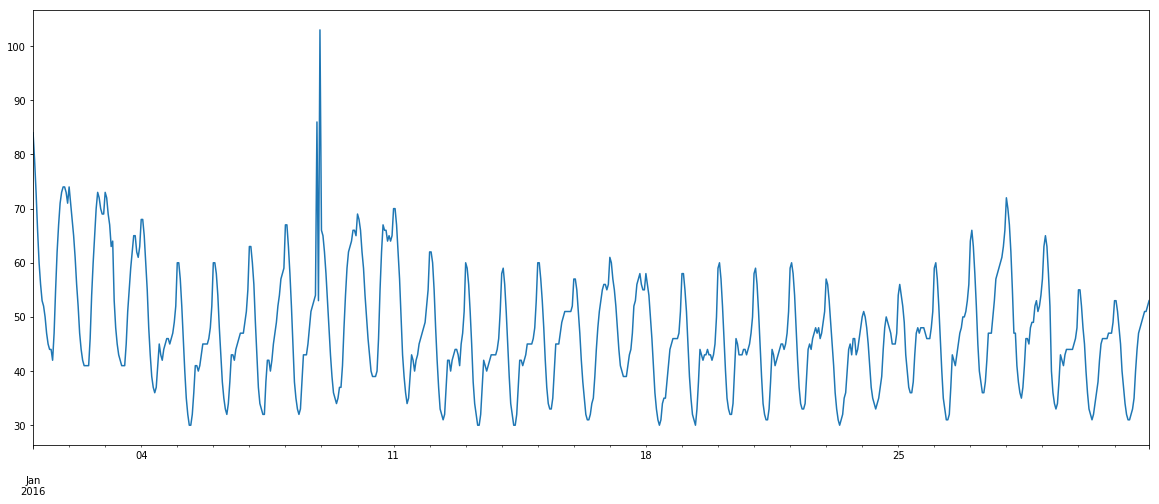

In [100]:
import matplotlib.pyplot as plt
df_read.loc['2016-01-01 00:00:00+00:00':'2016-01-31 23:00:00+00:00'].plot(figsize=[20,8])

C:\Users\dmuldrew\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


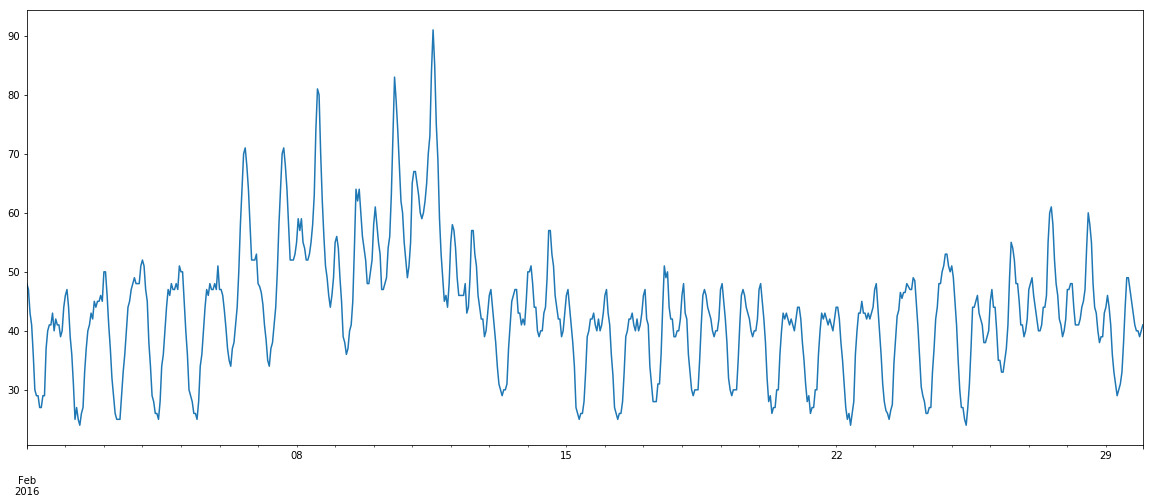

In [123]:
df_read.loc['2016-02-01 00:00:00+00:00':'2016-02-29 23:00:00+00:00'].plot(figsize=[20,8])

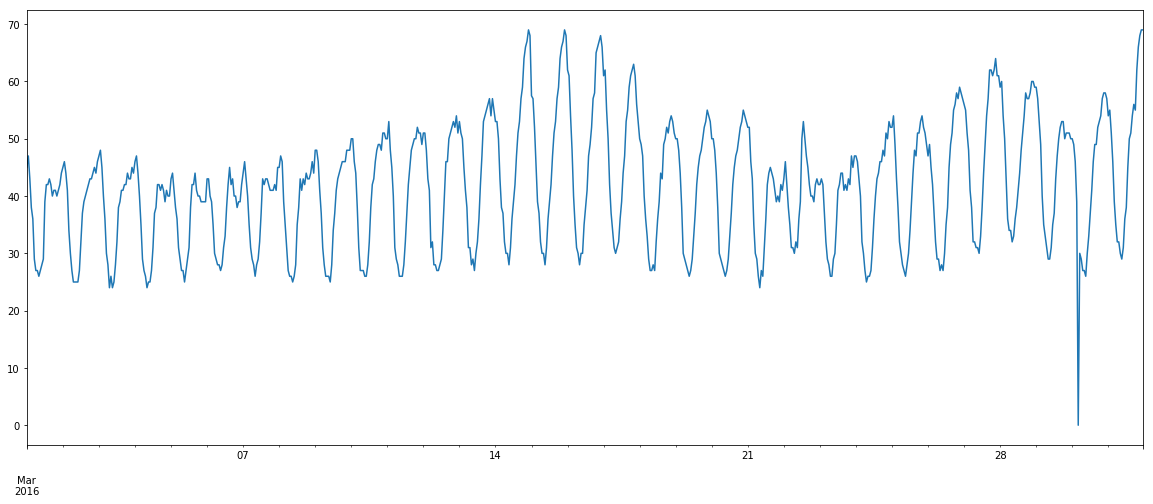

In [124]:
df_read.loc['2016-03-01 00:00:00+00:00':'2016-03-31 23:00:00+00:00'].plot(figsize=[20,8])

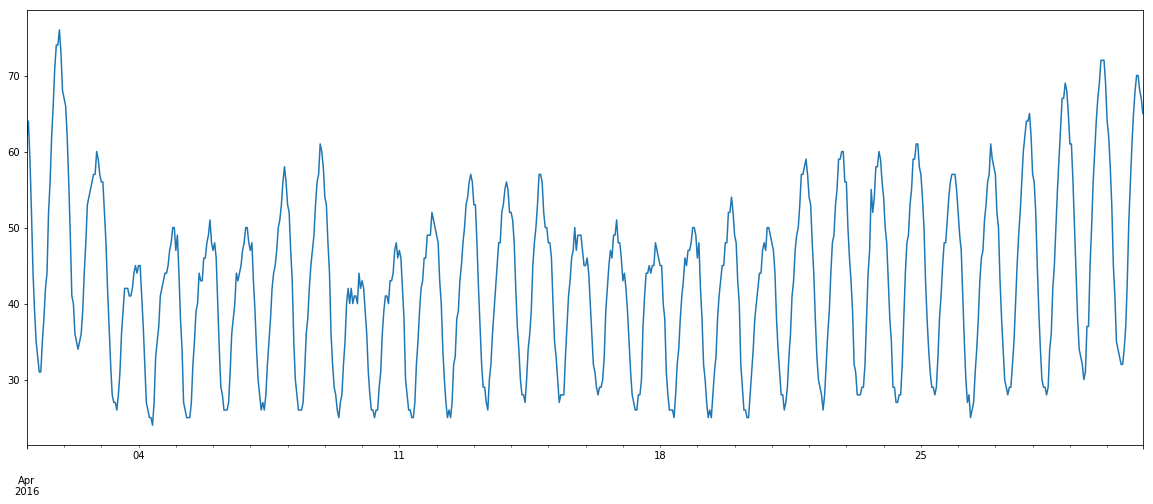

In [125]:
df_read.loc['2016-04-01 00:00:00+00:00':'2016-04-30 23:00:00+00:00'].plot(figsize=[20,8])

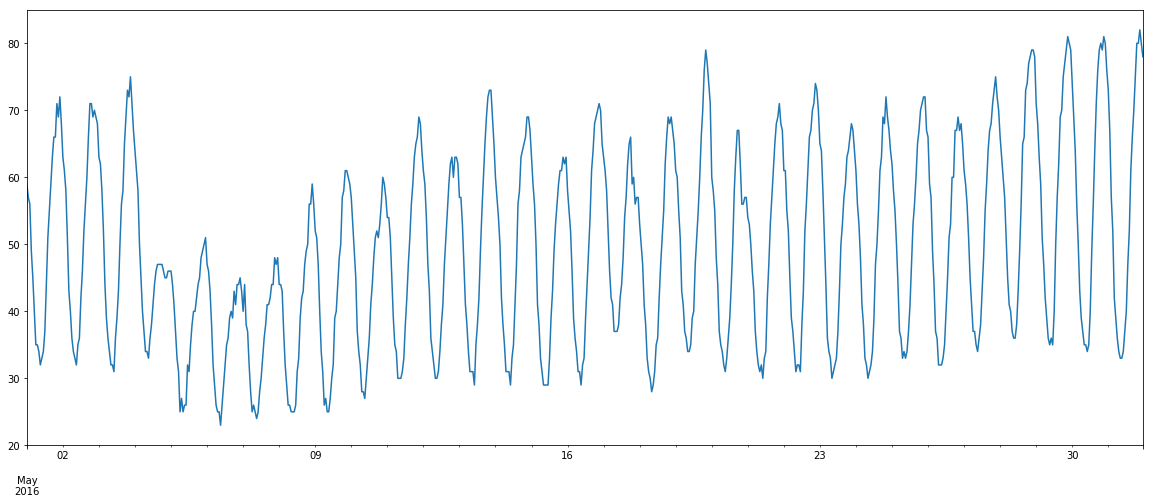

In [126]:
df_read.loc['2016-05-01 00:00:00+00:00':'2016-05-31 23:00:00+00:00'].plot(figsize=[20,8])

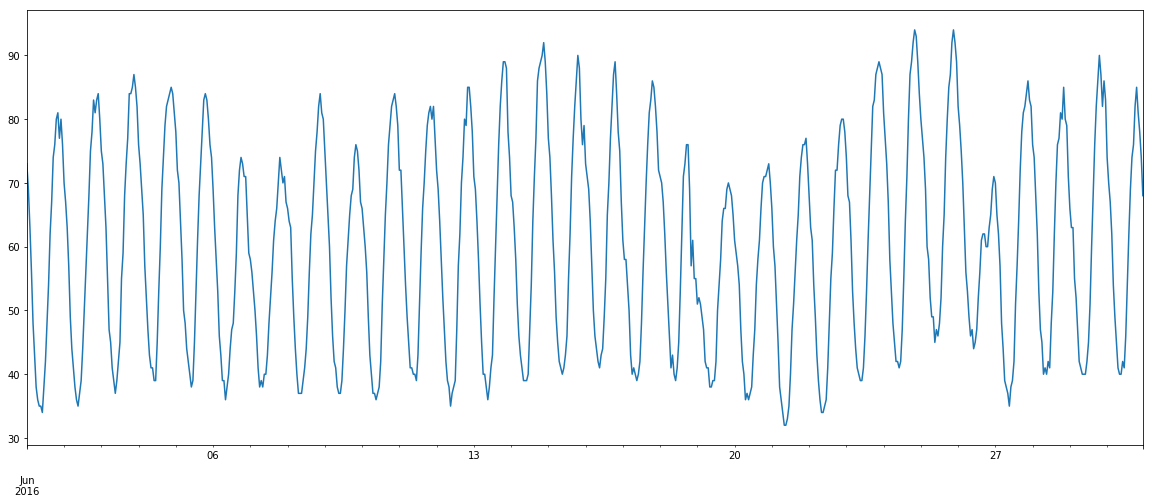

In [134]:
df_read.loc['2016-06-01 00:00:00+00:00':'2016-06-30 23:00:00+00:00'].plot(figsize=[20,8])

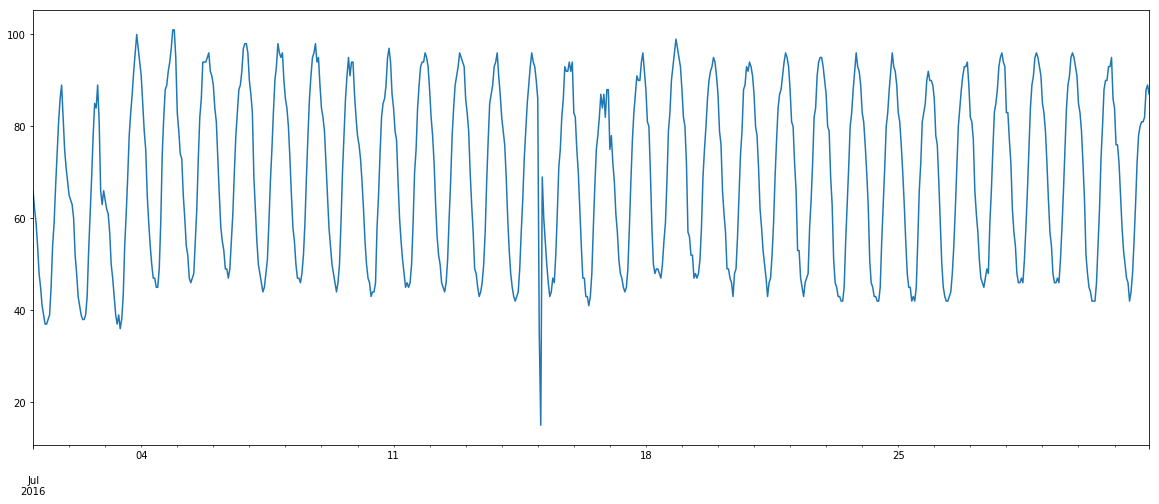

In [128]:
df_read.loc['2016-07-01 00:00:00+00:00':'2016-07-31 23:00:00+00:00'].plot(figsize=[20,8])

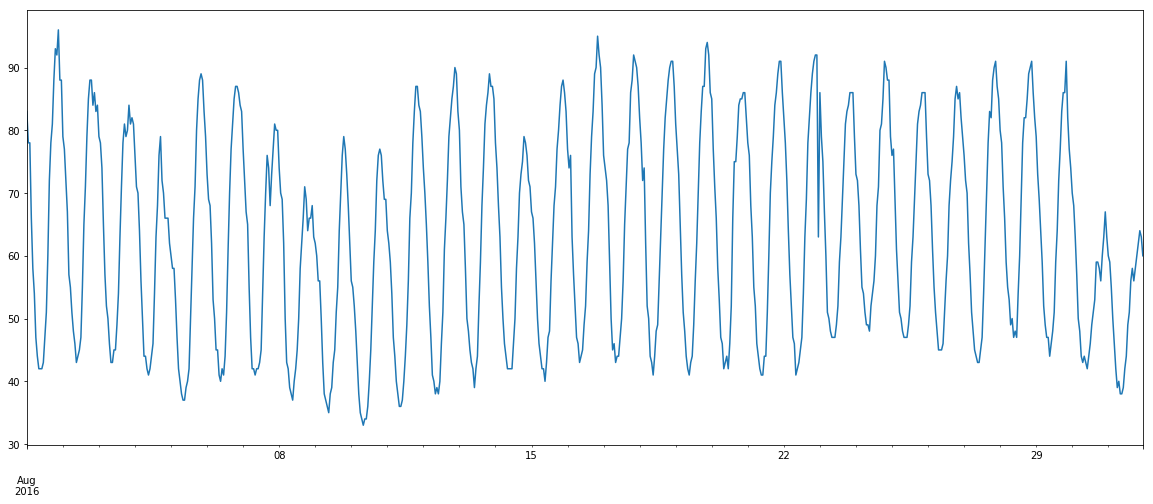

In [129]:
df_read.loc['2016-08-01 00:00:00+00:00':'2016-08-31 23:00:00+00:00'].plot(figsize=[20,8])

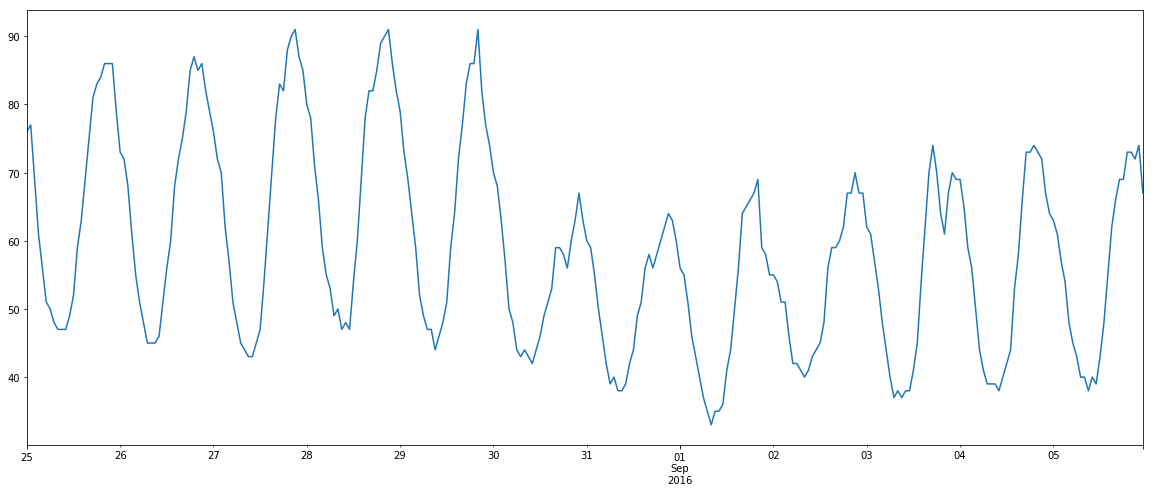

In [130]:
df_read.loc['2016-08-25 00:00:00+00:00':'2016-09-5 23:00:00+00:00'].plot(figsize=[20,8])

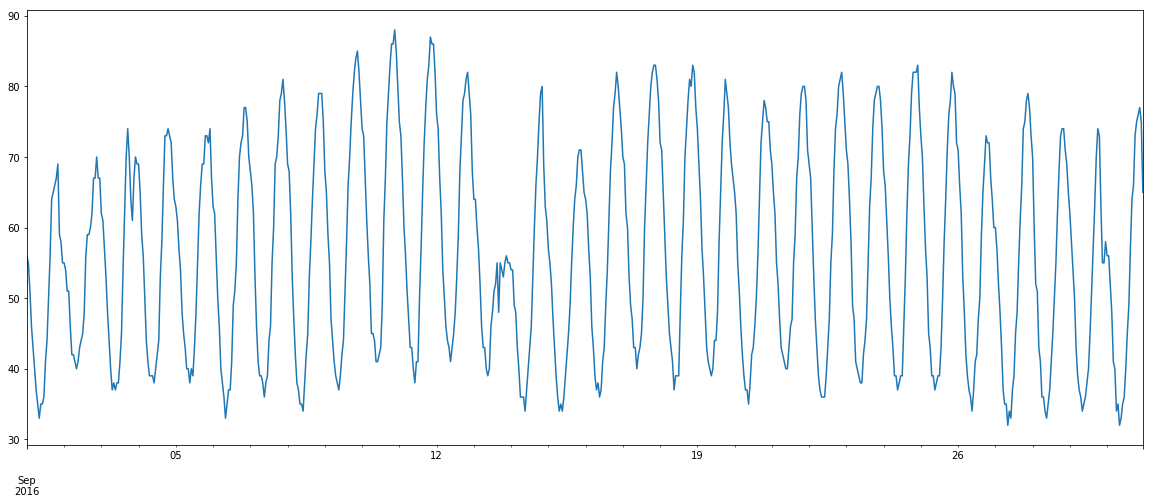

In [131]:
df_read.loc['2016-09-01 00:00:00+00:00':'2016-09-30 23:00:00+00:00'].plot(figsize=[20,8])

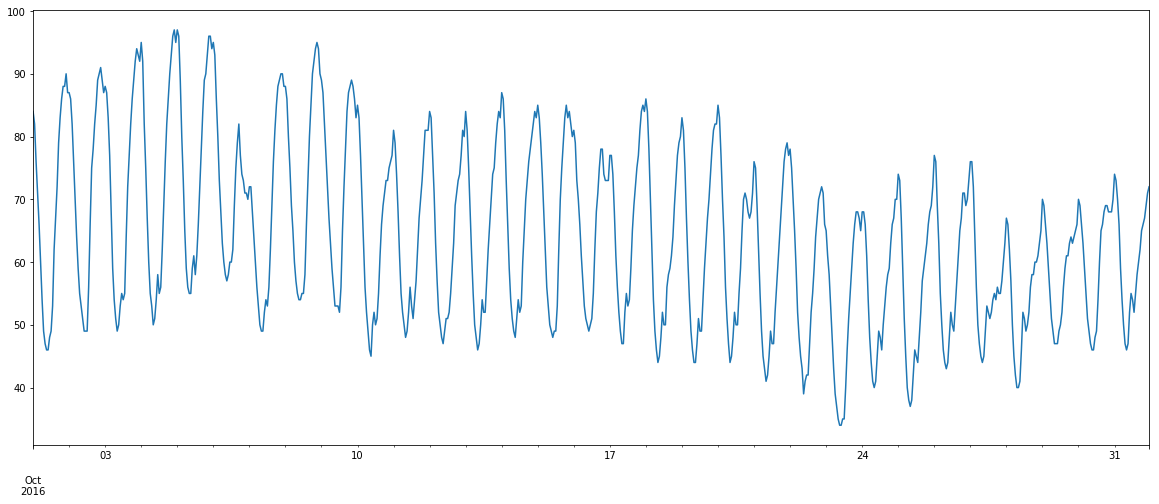

In [109]:
df_read.loc['2016-10-01 00:00:00+00:00':'2016-10-31 23:00:00+00:00'].plot(figsize=[20,8])

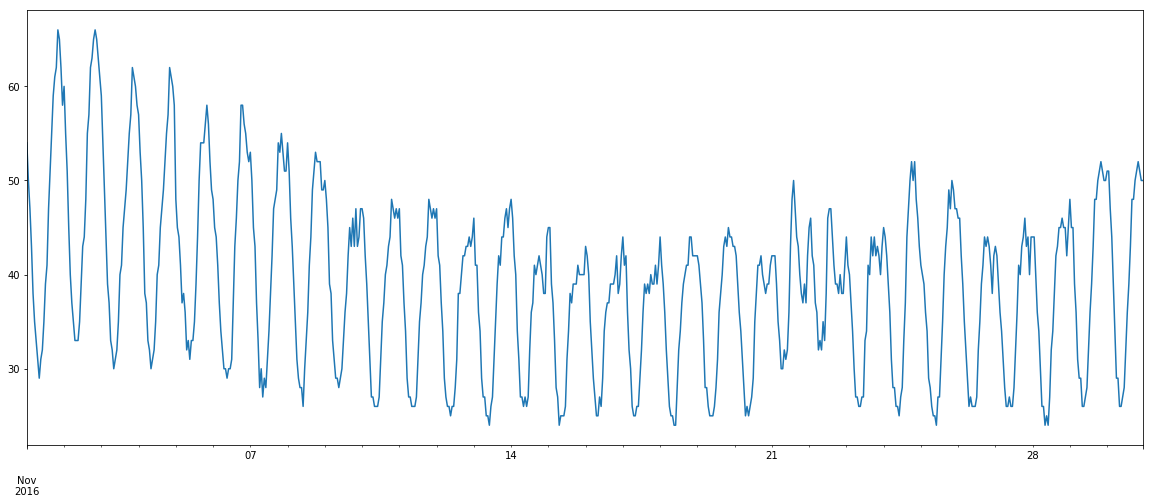

In [132]:
df_read.loc['2016-11-01 00:00:00+00:00':'2016-11-30 23:00:00+00:00'].plot(figsize=[20,8])

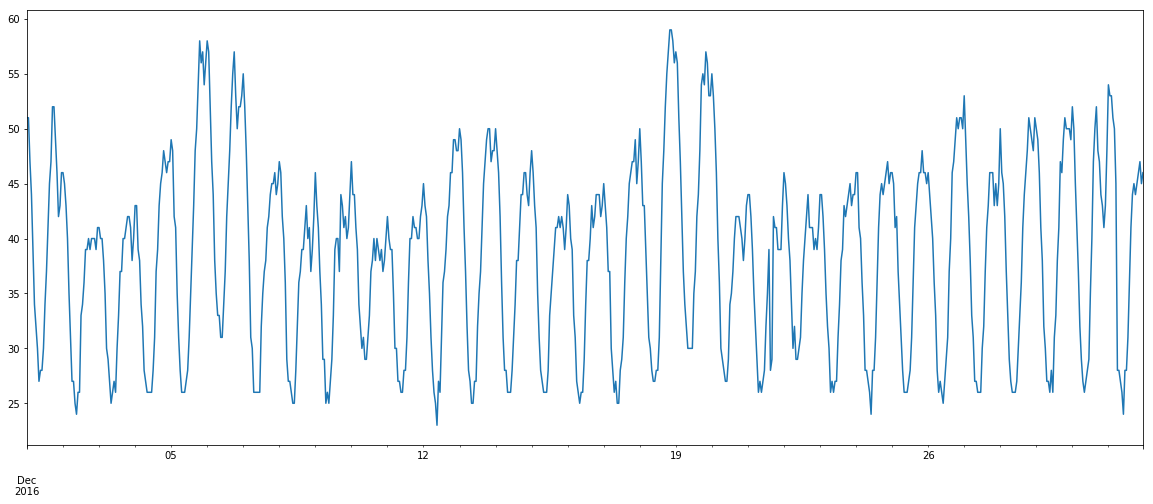

In [133]:
df_read.loc['2016-12-01 00:00:00+00:00':'2016-12-31 23:00:00+00:00'].plot(figsize=[20,8])

In [187]:
import os
os.getcwd()

'C:\\Users\\dmuldrew\\Dropbox (IVL)\\Explorations\\DanM'